<font color="#CC3D3D"><p>
# ML Case Study #3

### 1. Problem Definition
- The firm asks you to complete the analysis of predicting demographics of department store customers using purchase records. 
- Given the training and test files and training labels, predict the labels of the test data and submit the results in the csv format.

### 2. Data Collection

*Load Libraries*

In [1]:
%run import_modules.py
%matplotlib inline

*Read Transaction Data*

In [2]:
df_train = pd.read_csv('X_train.csv', encoding='cp949')
df_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv').gender
IDtest = df_test.cust_id.unique()

df_train

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000
...,...,...,...,...,...,...,...
231999,3499,2007-12-17 00:00:00,본 점,127129,상품군미지정,기타,-135000
232000,3499,2007-12-23 00:00:00,노원점,285136,시티웨어,시티웨어,6380000
232001,3499,2007-12-23 00:00:00,노원점,39107,야채,농산물,40800
232002,3499,2007-12-27 00:00:00,본 점,740120,어덜트,명품,4880000


### 3. Data Preprocessing - Make Features

*Generate BOW based features*

In [14]:
level = 'gds_grp_nm'

train_test1 = pd.pivot_table(pd.concat([df_train, df_test]), index='cust_id', columns=level, values='amount',
                            aggfunc=lambda x: len(x), fill_value=0).reset_index()
train_test2 = pd.pivot_table(pd.concat([df_train, df_test]), index='cust_id', columns=level, values='amount',
                           aggfunc=lambda x: np.where(len(x) >=1, 1, 0), fill_value=0).reset_index()

display(train_test1)
display(train_test2)

gds_grp_nm,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,한실침구,한차,햄,햄세트,향수,헤어ACC,홈웨어,화장품,회,휴지류
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
5978,5978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5979,5979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


gds_grp_nm,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,한실침구,한차,햄,햄세트,향수,헤어ACC,홈웨어,화장품,회,휴지류
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5978,5978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5979,5979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train_test = pd.merge(train_test1, train_test2, on='cust_id')
train_test

gds_grp_nm,cust_id,14K_x,4대 B/D_x,"IT 게임기,S/W_x",KKD_x,L.B_x,L/C 아동복_x,L/C골프의류_x,L/C정장_x,MP3 外_x,...,한실침구_y,한차_y,햄_y,햄세트_y,향수_y,헤어ACC_y,홈웨어_y,화장품_y,회_y,휴지류_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
5978,5978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5979,5979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Data Preprocessing - Feature Engineering

*Normalize Features & Reduce Dimension*
*Reduce Dimension*

In [36]:
# 이상치(outlier)를 제거한다.
train_test.iloc[:,1:] = train_test.iloc[:,1:].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

# 왼쪽으로 치우진 분포를 정규분포로 바꾸기 위해 로그 변환을 수행한다.
train_test.iloc[:,1:] = np.log1p(train_test.iloc[:,1:])

#from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
train_test.iloc[:, 1:] = mmscaler.fit_transform(train_test.iloc[:,1:])

# 특성 차원이 너무 많을 경우 과적합이 발생하기 때문에 차원 축소를 실행한다.
max_d = num_d = train_test.shape[1] - 1
pca = PCA(n_components=max_d, random_state=0).fit(train_test.iloc[:,1:])
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.99) + 1             # 분산의 설명량이 99%이상 되는 차원의 수
if num_d == 1: num_d = max_d
pca = PCA(n_components=num_d, random_state=0).fit_transform(train_test.iloc[:,1:])
train_test = pd.concat([train_test.iloc[:,0], pd.DataFrame(pca)], axis=1)
display(train_test)

# 전처리 후 학습용과 제출용 데이터로 분리한다.
train_x = train_test.query('cust_id not in @IDtest').drop('cust_id', axis=1)
test_x = train_test.query('cust_id in @IDtest').drop('cust_id', axis=1)

,cust_id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,1.189433,0.174868,-1.137531,-0.989146,0.442193,-0.150671,1.060671,0.533816,-1.258016,...,0.010174,-0.106808,-0.132274,-0.021914,-0.085027,-0.032272,0.165524,-0.199840,0.069078,-0.068706
1,1,-1.890581,-0.084980,-0.002389,0.321971,-0.357469,0.286372,0.038432,0.136598,0.021546,...,-0.030308,0.032414,-0.006008,0.006899,0.007671,0.045753,0.019066,-0.037907,-0.021239,-0.025832
2,2,-1.790462,-0.112680,-0.007311,-0.007418,-0.160073,0.383480,0.274801,-0.098685,-0.130048,...,0.048951,-0.027051,0.001166,0.032571,-0.012604,0.013392,-0.106402,-0.030706,-0.024707,-0.035846
3,3,0.817999,-1.290334,-0.653666,0.177265,-0.283830,-0.279176,-0.363521,-0.279112,0.901201,...,0.035124,0.083396,0.865799,-0.573117,-0.045440,0.046553,-0.020638,0.006216,-0.146875,0.058413
4,4,-1.764013,-0.184043,-0.021293,0.191940,0.082353,-0.245299,-0.236304,0.146952,0.101727,...,0.027872,-0.013406,-0.010021,0.039840,-0.029631,0.020146,-0.080949,0.210922,-0.062327,-0.049876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,-1.452037,0.397239,-0.176042,-0.039935,-0.173802,0.084834,0.247999,-0.045456,-0.116691,...,-0.152323,-0.124130,0.036854,0.061585,-0.031411,0.001527,-0.086647,-0.024526,0.005437,-0.023076
5978,5978,-1.928296,-0.223151,0.059997,-0.103506,0.085619,0.130547,-0.015713,0.112627,0.155611,...,-0.010040,-0.012044,-0.017814,-0.003446,0.007605,0.001191,-0.005865,-0.016456,0.012206,-0.019727
5979,5979,0.290705,2.490756,-0.869679,0.577565,-0.391554,2.058315,-0.813411,0.050310,-0.008376,...,-0.075859,-0.059856,0.055466,0.032427,-0.023390,0.054599,-0.094246,-0.017027,-0.035239,0.037704
5980,5980,-1.111630,-0.368928,-0.308249,-0.036566,-0.237499,0.138450,0.496799,0.749187,0.038565,...,0.159025,0.019334,-0.028015,-0.070938,-0.006145,-0.007906,0.069574,0.002959,-0.002813,0.053637


*Select Features*

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:17<00:00,  5.42it/s]


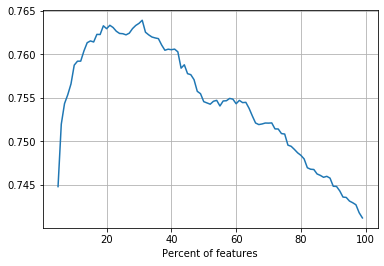

In [39]:
skf = StratifiedKFold(n_splits=4, shuffle=False, random_state=2020)

model = LogisticRegression(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(train_x, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    cv_scores.append((p,cv_score.mean()))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print()

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [41]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
selectp = SelectPercentile(percentile=best_score[0]).fit(train_x, y_train)
X_train_sel = selectp.transform(train_x)
X_test_sel = selectp.transform(test_x)

In [40]:
best_score[0]

31

In [42]:
X_train_sel.shape


(3500, 37)

In [43]:
pd.DataFrame(X_train_sel).to_csv('train_numbersOfPurchase&isPurchase_nm_percentile.csv', index=False, encoding='cp949')
pd.DataFrame(X_test_sel).to_csv('test_numbersOfPurchase&isPurchase_nm_percentile.csv', index=False, encoding='cp949')


대분류 구매건수 percentile

In [6]:
df_train = pd.read_csv('X_train.csv', encoding='cp949')
df_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv').gender
IDtest = df_test.cust_id.unique()



level = 'gds_grp_mclas_nm'

train_test = pd.pivot_table(pd.concat([df_train, df_test]), index='cust_id', columns=level, values='amount',
                             aggfunc=lambda x: len(x), fill_value=0).reset_index()
# train_test2 = pd.pivot_table(pd.concat([df_train, df_test]), index='cust_id', columns=level, values='amount',
#                            aggfunc=lambda x: np.where(len(x) >=1, 1, 0), fill_value=0).reset_index()

# 이상치(outlier)를 제거한다.
train_test.iloc[:,1:] = train_test.iloc[:,1:].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

# 왼쪽으로 치우진 분포를 정규분포로 바꾸기 위해 로그 변환을 수행한다.
train_test.iloc[:,1:] = np.log1p(train_test.iloc[:,1:])

#from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
train_test.iloc[:, 1:] = mmscaler.fit_transform(train_test.iloc[:,1:])

# 특성 차원이 너무 많을 경우 과적합이 발생하기 때문에 차원 축소를 실행한다.
max_d = num_d = train_test.shape[1] - 1
pca = PCA(n_components=max_d, random_state=0).fit(train_test.iloc[:,1:])
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.99) + 1             # 분산의 설명량이 99%이상 되는 차원의 수
if num_d == 1: num_d = max_d
pca = PCA(n_components=num_d, random_state=0).fit_transform(train_test.iloc[:,1:])
train_test = pd.concat([train_test.iloc[:,0], pd.DataFrame(pca)], axis=1)
display(train_test)

# 전처리 후 학습용과 제출용 데이터로 분리한다.
train_x = train_test.query('cust_id not in @IDtest').drop('cust_id', axis=1)
test_x = train_test.query('cust_id in @IDtest').drop('cust_id', axis=1)

,cust_id,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0,0.808812,0.047621,-0.382530,0.136842,0.068270,-1.067826,0.097073,0.064659,0.123847,...,0.278258,-0.198159,-0.226099,-0.038080,0.324296,-0.434571,-0.308631,-0.016363,0.194200,-0.018975
1,1,-0.942326,0.181016,0.039485,0.224548,0.165447,0.185474,0.260437,0.067577,-0.233817,...,-0.035076,-0.147834,0.062239,0.060819,-0.054463,-0.387346,0.112056,-0.059185,0.006323,-0.030976
2,2,-0.939487,0.072728,-0.171136,0.257513,-0.163384,-0.015842,-0.109646,0.098185,-0.189282,...,0.057341,0.047966,-0.038936,-0.112071,-0.006490,0.062245,-0.004990,0.035366,0.044459,0.039179
3,3,0.176414,-0.540114,-0.095850,0.039596,0.054163,0.377580,0.169790,-0.019942,0.183439,...,0.156863,-0.014416,-0.061704,0.120444,-0.374014,0.177117,-0.243579,0.075744,-0.142311,-0.229687
4,4,-1.006475,-0.015659,0.083409,-0.036429,0.082568,-0.020770,0.012661,-0.029358,0.030033,...,0.008659,0.040425,-0.007492,0.042274,0.049531,-0.034650,-0.017044,-0.018064,0.021210,-0.000362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,-0.527805,0.460797,-0.064967,-0.029257,0.232430,-0.141500,0.104384,0.065651,-0.706434,...,-0.477599,0.215720,0.023805,0.367133,0.026163,0.424302,-0.089105,-0.048746,0.062714,-0.055811
5978,5978,-1.038196,0.022598,0.023371,-0.003908,0.008111,0.030509,-0.068062,-0.030968,0.011029,...,0.106910,0.017061,0.158339,-0.014808,-0.045128,0.014905,-0.012643,-0.058065,0.033216,-0.046763
5979,5979,0.672151,1.288926,0.047105,0.442555,-0.225962,0.620944,-0.542938,-0.306575,-0.724191,...,-0.267473,0.172990,0.246498,-0.123809,-0.203993,-0.005225,-0.029028,0.124641,0.155520,0.100988
5980,5980,-0.561052,-0.015907,0.100263,0.082922,-0.023670,0.353346,0.424770,-0.039177,0.215357,...,0.149904,-0.020741,-0.158265,0.161862,-0.201403,-0.103223,-0.567873,-0.410687,-0.080075,0.002968


100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:04<00:00, 22.14it/s]

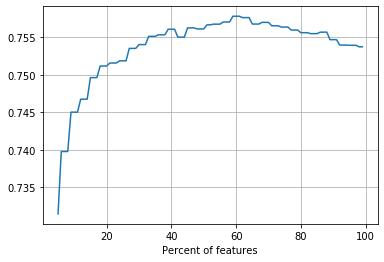

In [7]:
skf = StratifiedKFold(n_splits=4, shuffle=False, random_state=2020)

model = LogisticRegression(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(train_x, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    cv_scores.append((p,cv_score.mean()))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print()

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [8]:
best_score[0]

59

In [10]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
selectp = SelectPercentile(percentile=best_score[0]).fit(train_x, y_train)
X_train_sel = selectp.transform(train_x)
X_test_sel = selectp.transform(test_x)

In [11]:
X_train_sel.shape

(3500, 21)

In [12]:
pd.DataFrame(X_train_sel).to_csv('train_numbersOfPurchase_mclas_percentile.csv', index=False, encoding='cp949')
pd.DataFrame(X_test_sel).to_csv('test_numbersOfPurchase_mclas_percentile.csv', index=False, encoding='cp949')


대분류 구매건수 & 구매여부

In [13]:
df_train = pd.read_csv('X_train.csv', encoding='cp949')
df_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv').gender
IDtest = df_test.cust_id.unique()



level = 'gds_grp_mclas_nm'

train_test1 = pd.pivot_table(pd.concat([df_train, df_test]), index='cust_id', columns=level, values='amount',
                             aggfunc=lambda x: len(x), fill_value=0).reset_index()
train_test2 = pd.pivot_table(pd.concat([df_train, df_test]), index='cust_id', columns=level, values='amount',
                           aggfunc=lambda x: np.where(len(x) >=1, 1, 0), fill_value=0).reset_index()

train_test = pd.merge(train_test1, train_test2, on='cust_id')
train_test

# 이상치(outlier)를 제거한다.
train_test.iloc[:,1:] = train_test.iloc[:,1:].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

# 왼쪽으로 치우진 분포를 정규분포로 바꾸기 위해 로그 변환을 수행한다.
train_test.iloc[:,1:] = np.log1p(train_test.iloc[:,1:])

#from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
train_test.iloc[:, 1:] = mmscaler.fit_transform(train_test.iloc[:,1:])

# 특성 차원이 너무 많을 경우 과적합이 발생하기 때문에 차원 축소를 실행한다.
max_d = num_d = train_test.shape[1] - 1
pca = PCA(n_components=max_d, random_state=0).fit(train_test.iloc[:,1:])
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.99) + 1             # 분산의 설명량이 99%이상 되는 차원의 수
if num_d == 1: num_d = max_d
pca = PCA(n_components=num_d, random_state=0).fit_transform(train_test.iloc[:,1:])
train_test = pd.concat([train_test.iloc[:,0], pd.DataFrame(pca)], axis=1)
display(train_test)

# 전처리 후 학습용과 제출용 데이터로 분리한다.
train_x = train_test.query('cust_id not in @IDtest').drop('cust_id', axis=1)
test_x = train_test.query('cust_id in @IDtest').drop('cust_id', axis=1)

,cust_id,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,51
0,0,1.623794,-0.026206,-0.609631,0.252919,-0.040521,-1.666201,0.501939,0.249417,0.591172,...,-0.282949,-0.037638,-0.199103,0.186637,0.212401,0.319022,-0.109461,0.206718,0.080069,0.057083
1,1,-1.747242,0.473248,0.473530,0.511227,-0.141087,0.377894,0.466137,0.365241,0.039083,...,-0.010349,0.024443,-0.034654,0.023069,-0.011922,-0.011870,-0.004578,-0.009224,0.000799,-0.005194
2,2,-1.747701,0.188021,-0.086980,0.551695,0.330218,-0.140628,-0.100882,0.168284,0.081031,...,0.007915,-0.021509,0.018461,0.003025,-0.007471,0.016226,-0.002820,0.000404,-0.019036,0.015246
3,3,0.747547,-1.100131,-0.081633,0.489099,-0.404553,0.840658,0.080974,-0.682232,-0.729025,...,-0.175385,0.128063,0.007003,-0.039350,-0.050428,-0.138685,-0.134293,-0.189350,0.072073,0.137014
4,4,-1.715523,0.082752,0.194704,-0.283260,-0.330221,-0.241591,-0.040755,0.077664,-0.117755,...,-0.019822,-0.064290,0.020644,-0.027603,0.027322,-0.018680,0.000550,0.007931,-0.009935,0.009430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,-0.911166,0.938193,-0.089512,0.051166,-0.183704,0.045114,0.192914,0.721653,0.426254,...,0.049019,-0.029081,0.074438,-0.072143,0.055378,-0.051267,-0.054210,-0.141003,-0.076529,-0.136269
5978,5978,-1.865698,0.203164,0.096986,0.023676,0.025279,0.025785,-0.497516,0.088624,-0.131836,...,0.076737,0.131730,0.044904,-0.022744,0.059327,-0.006596,0.009481,0.019133,-0.018913,0.021565
5979,5979,1.228618,1.993153,0.746658,1.053280,0.147801,0.535829,-0.670926,-0.261519,-0.584552,...,-0.039119,-0.037779,-0.335634,0.068303,-0.073947,-0.007396,0.064690,0.241374,0.089495,-0.120303
5980,5980,-1.053642,0.023743,0.326006,0.171757,0.078446,0.807129,0.454926,-0.516497,0.930273,...,-0.077175,-0.003327,-0.108207,0.161436,0.177727,0.328186,0.044081,-0.160436,-0.076627,-0.027988


100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:04<00:00, 19.27it/s]

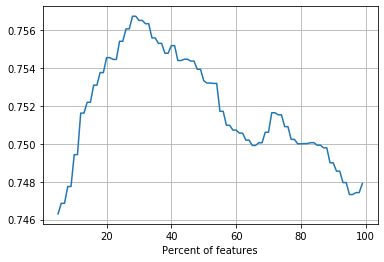

In [14]:
skf = StratifiedKFold(n_splits=4, shuffle=False, random_state=2020)

model = LogisticRegression(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(train_x, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    cv_scores.append((p,cv_score.mean()))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print()

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [15]:
best_score[0]

28

In [16]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
selectp = SelectPercentile(percentile=best_score[0]).fit(train_x, y_train)
X_train_sel = selectp.transform(train_x)
X_test_sel = selectp.transform(test_x)

In [17]:
X_train_sel.shape

(3500, 15)

In [18]:
pd.DataFrame(X_train_sel).to_csv('train_numbersOfPurchase&isPurchase_mclas_percentile.csv', index=False, encoding='cp949')
pd.DataFrame(X_test_sel).to_csv('test_numbersOfPurchase&isPurchase_mclas_percentile.csv', index=False, encoding='cp949')
